Train Shape: (891, 12)
Test Shape: (418, 11)

Train Data Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123 

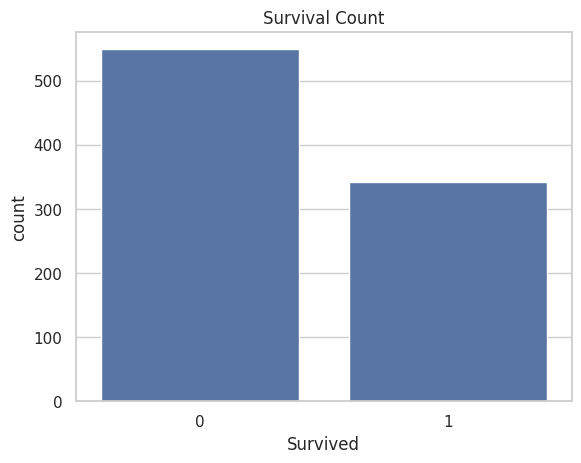

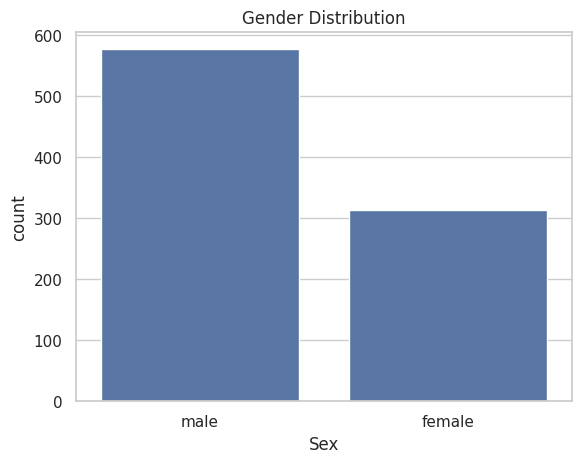

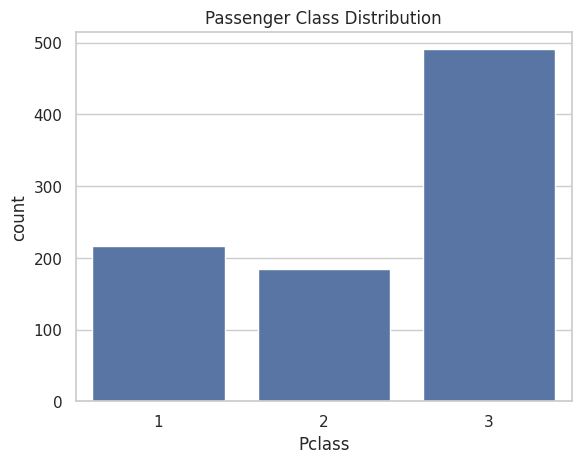

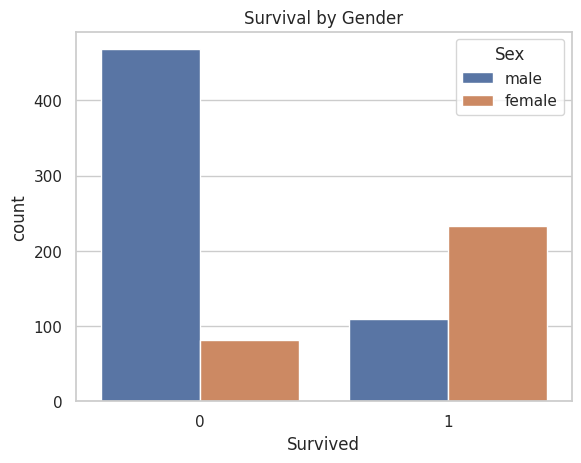

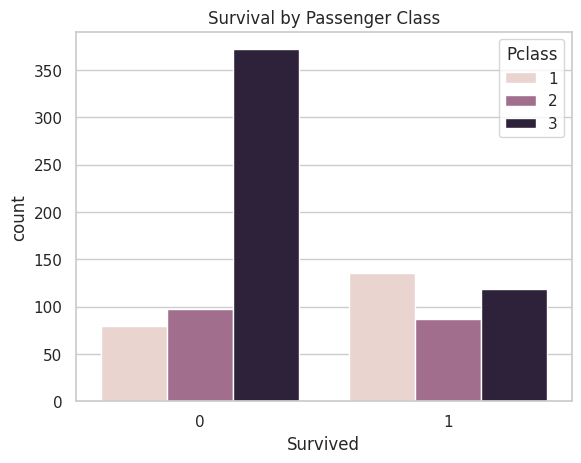

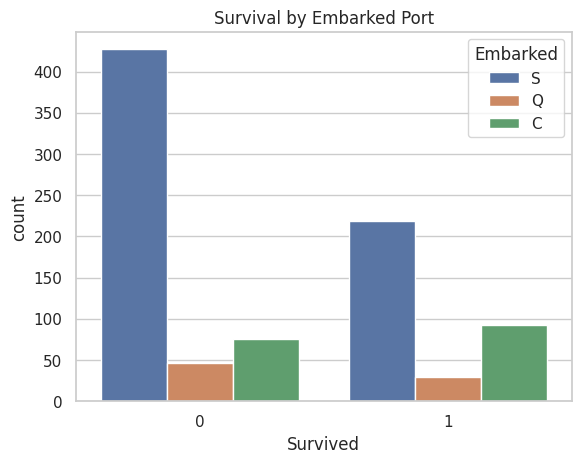

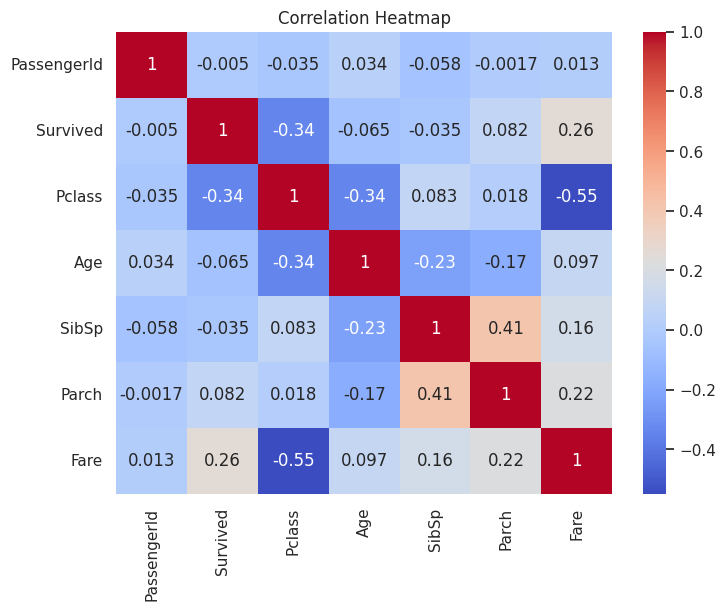

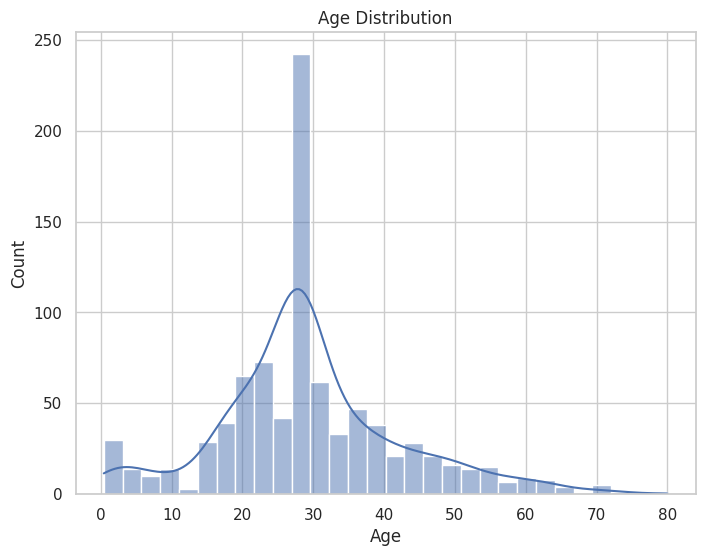

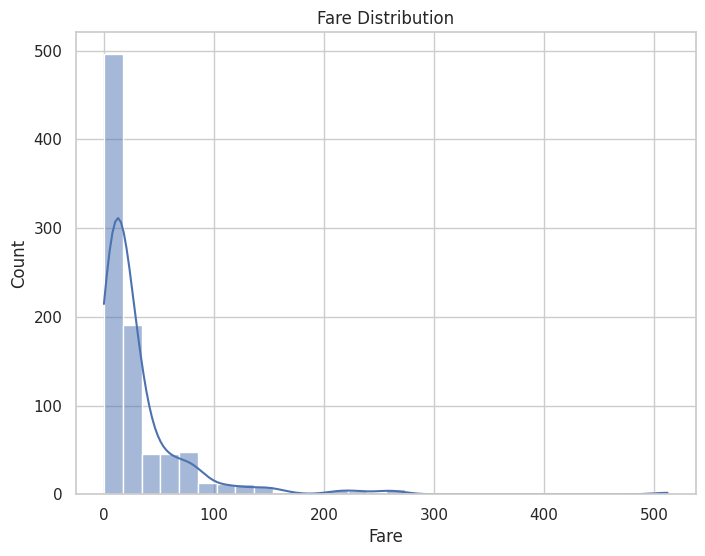

Cleaned train & test datasets saved.


In [1]:
# Titanic Dataset - Data Cleaning & Exploratory Data Analysis
# Author: Your Name

# =============================
# 1. Import Libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")

# =============================
# 2. Load Data
# =============================
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
print("\nTrain Data Preview:")
print(train.head())

# =============================
# 3. Data Info & Missing Values
# =============================
print("\nMissing Values in Train Data:")
print(train.isnull().sum())

# =============================
# 4. Data Cleaning
# =============================

# Fill missing Age with median
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

# Fill missing Embarked with mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Fill missing Fare in test data with median
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Drop Cabin due to too many missing values
train = train.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])

print("\nMissing Values After Cleaning:")
print(train.isnull().sum())

# =============================
# 5. Descriptive Statistics
# =============================
print("\nSummary Statistics:")
print(train.describe(include='all'))

# =============================
# 6. Univariate Analysis
# =============================

# Survival count
sns.countplot(x='Survived', data=train)
plt.title("Survival Count")
plt.show()

# Gender distribution
sns.countplot(x='Sex', data=train)
plt.title("Gender Distribution")
plt.show()

# Passenger class distribution
sns.countplot(x='Pclass', data=train)
plt.title("Passenger Class Distribution")
plt.show()

# =============================
# 7. Bivariate Analysis
# =============================

# Survival by gender
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title("Survival by Gender")
plt.show()

# Survival by class
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title("Survival by Passenger Class")
plt.show()

# Survival by Embarked
sns.countplot(x='Survived', hue='Embarked', data=train)
plt.title("Survival by Embarked Port")
plt.show()

# =============================
# 8. Correlation Heatmap
# =============================
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# =============================
# 9. Age & Fare Distribution
# =============================
plt.figure(figsize=(8,6))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

# =============================
# 10. Save Cleaned Data
# =============================
train.to_csv("train_cleaned.csv", index=False)
test.to_csv("test_cleaned.csv", index=False)
print("Cleaned train & test datasets saved.")
